<a href="https://colab.research.google.com/github/AugustoBonifacio001/AugustoBonifacio001/blob/main/trabalho_bolsa_2025_harm%C3%B4nicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

omp, dct
Iteração 1 de 200 (0.5%)
Iteração 2 de 200 (1.0%)
Iteração 3 de 200 (1.5%)
Iteração 4 de 200 (2.0%)
Iteração 5 de 200 (2.5%)
Iteração 6 de 200 (3.0%)
Iteração 7 de 200 (3.5%)
Iteração 8 de 200 (4.0%)
Iteração 9 de 200 (4.5%)
Iteração 10 de 200 (5.0%)
Iteração 11 de 200 (5.5%)
Iteração 12 de 200 (6.0%)
Iteração 13 de 200 (6.5%)
Iteração 14 de 200 (7.0%)
Iteração 15 de 200 (7.5%)
Iteração 16 de 200 (8.0%)
Iteração 17 de 200 (8.5%)
Iteração 18 de 200 (9.0%)
Iteração 19 de 200 (9.5%)
Iteração 20 de 200 (10.0%)
Iteração 21 de 200 (10.5%)
Iteração 22 de 200 (11.0%)
Iteração 23 de 200 (11.5%)
Iteração 24 de 200 (12.0%)
Iteração 25 de 200 (12.5%)
Iteração 26 de 200 (13.0%)
Iteração 27 de 200 (13.5%)
Iteração 28 de 200 (14.0%)
Iteração 29 de 200 (14.5%)
Iteração 30 de 200 (15.0%)
Iteração 31 de 200 (15.5%)
Iteração 32 de 200 (16.0%)
Iteração 33 de 200 (16.5%)
Iteração 34 de 200 (17.0%)
Iteração 35 de 200 (17.5%)
Iteração 36 de 200 (18.0%)
Iteração 37 de 200 (18.5%)
Iteração 38 de 200 (

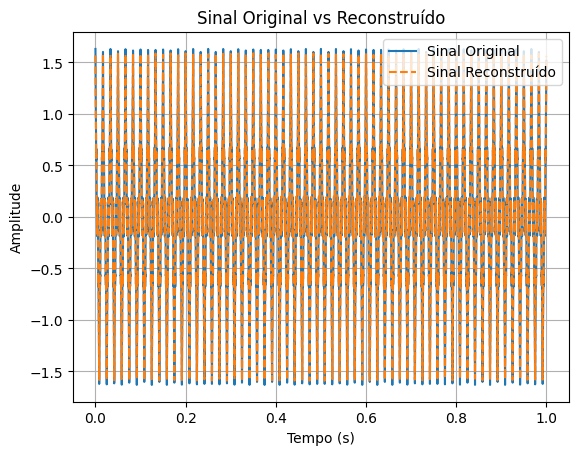

In [7]:
# -*- coding: utf-8 -*-
"""
Created on Mon Feb 24 08:54:39 2025

@author: josea
"""

import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as spfft
from sklearn.linear_model import OrthogonalMatchingPursuit

print("omp, dct")
# Função para calcular o PRD
def calculate_prd(original, reconstructed):
    return np.sqrt(np.sum((original - reconstructed) ** 2) / np.sum(original ** 2))

# Função para calcular o Erro Médio Quadrático (RMSE)
def calculate_rmse(original, reconstructed):
    return np.sqrt(np.mean((original - reconstructed) ** 2))

# Parâmetros do sinal
Nppc = 256  # Número de pontos por ciclo
Nc = 12        # Número de ciclos
f = 60         # Frequência fundamental (Hz)
Fs = 8192      # Frequência de amostragem
Ts = 1 / Fs    # Período de amostragem
t = np.linspace(0, (Fs - 1) * Ts, Fs)  # Vetor de tempo

# Sinal harmônico com componentes fundamentais e harmônicos ímpares
x = np.cos(2 * np.pi * f * t)  # Componente fundamental (60 Hz)
y = np.zeros_like(x)

harm = [1, 3, 7, 15, 27, 35, 45]
for i in range(len(harm)):
    y += (1 / harm[i]) * np.cos(2 * np.pi * harm[i] * f * t)

# Medição da FFT original
original_fft = 2 * np.abs(np.fft.fft(y) / len(y))[:len(y) // 2]
frequencies = np.fft.fftfreq(len(y), d=Ts)[:len(y) // 2]

# Amostragem Compressiva
CR = 30 # Taxa de compressão (%)
N = Fs
M = np.round(N * (100 - CR) / 100).astype(int)  # Número de medições
amostras_aleatorias = np.random.choice(N, M, replace=False)
amostras_aleatorias.sort()
s = y[amostras_aleatorias]
t2 = t[amostras_aleatorias]

# Matriz de Transformada Cosseno
A = spfft.idct(np.identity(N), norm='ortho', axis=0)
A = A[amostras_aleatorias]

# Inicializando matrizes para armazenar os erros, valores estimados, RMSE e PRD
num_iteracoes = 200
erros = np.zeros((num_iteracoes, len(harm)))  # Erros para cada harmônica
valores_estimados = np.zeros((num_iteracoes, len(harm)))  # Valores estimados
rmse_values = np.zeros(num_iteracoes)  # Para armazenar os valores de RMSE
prd_values = np.zeros(num_iteracoes)   # Para armazenar os valores de PRD

# Loop de reconstrução
for i in range(num_iteracoes):
    print(f"Iteração {i+1} de {num_iteracoes} ({(i+1)/num_iteracoes*100:.1f}%)")

    # Gerando amostras aleatórias do sinal
    s = y[amostras_aleatorias]

    # Aplicando OMP para reconstrução do sinal
    omp = OrthogonalMatchingPursuit(n_nonzero_coefs=14)  # Ajustado para o número de harmônicas
    omp.fit(A, s)
    recovered_signal = omp.coef_

    # Reconstrução do sinal
    sig = spfft.idct(recovered_signal, norm='ortho', axis=0)

    # Calculando a FFT do sinal reconstruído
    S = 2 * np.abs(np.fft.fft(sig) / len(sig))[:len(sig) // 2]

    # Calculando os valores estimados e erros para cada harmônica
    for idx, h in enumerate(harm):
        harmonic_index = int(h * f * N / Fs)  # Índice da harmônica na FFT
        harmonic_index = min(harmonic_index, len(S) - 1)  # Garantir que o índice esteja dentro dos limites
        valores_estimados[i, idx] = S[harmonic_index]  # Valor estimado da harmônica
        erros[i, idx] = np.abs(original_fft[harmonic_index] - S[harmonic_index])  # Erro absoluto

    # Calculando o RMSE e PRD para esta iteração
    rmse_values[i] = calculate_rmse(y, sig)
    prd_values[i] = calculate_prd(y, sig)

# Calculando as médias
media_valores_estimados = np.mean(valores_estimados, axis=0)
media_erros = np.mean(erros, axis=0)
media_rmse = np.mean(rmse_values)
media_prd = np.mean(prd_values)

# Exibindo os resultados
print("\nValores Estimados Médios das Harmônicas:")
for idx, h in enumerate(harm):
    print(f"Harmônica {h}: {media_valores_estimados[idx]:.4f}")

print("\nErros Médios das Harmônicas:")
for idx, h in enumerate(harm):
    print(f"Harmônica {h}: {media_erros[idx]:.4f}")

print(f"\nMédia do RMSE: {media_rmse:.4f}")
print(f"Média do PRD: {media_prd:.4f}")

# Gráficos finais
plt.figure()
plt.plot(t, y, label='Sinal Original')
plt.plot(t, sig, label='Sinal Reconstruído', linestyle='dashed')
plt.legend()
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Sinal Original vs Reconstruído')
plt.grid()
plt.show()



omp, dft
Iteração 1 de 200
Iteração 2 de 200
Iteração 3 de 200
Iteração 4 de 200
Iteração 5 de 200
Iteração 6 de 200
Iteração 7 de 200
Iteração 8 de 200
Iteração 9 de 200
Iteração 10 de 200
Iteração 11 de 200
Iteração 12 de 200
Iteração 13 de 200
Iteração 14 de 200
Iteração 15 de 200
Iteração 16 de 200
Iteração 17 de 200
Iteração 18 de 200
Iteração 19 de 200
Iteração 20 de 200
Iteração 21 de 200
Iteração 22 de 200
Iteração 23 de 200
Iteração 24 de 200
Iteração 25 de 200
Iteração 26 de 200
Iteração 27 de 200
Iteração 28 de 200
Iteração 29 de 200
Iteração 30 de 200
Iteração 31 de 200
Iteração 32 de 200
Iteração 33 de 200
Iteração 34 de 200
Iteração 35 de 200
Iteração 36 de 200
Iteração 37 de 200
Iteração 38 de 200
Iteração 39 de 200
Iteração 40 de 200
Iteração 41 de 200
Iteração 42 de 200
Iteração 43 de 200
Iteração 44 de 200
Iteração 45 de 200
Iteração 46 de 200
Iteração 47 de 200
Iteração 48 de 200
Iteração 49 de 200
Iteração 50 de 200
Iteração 51 de 200
Iteração 52 de 200
Iteração 53 

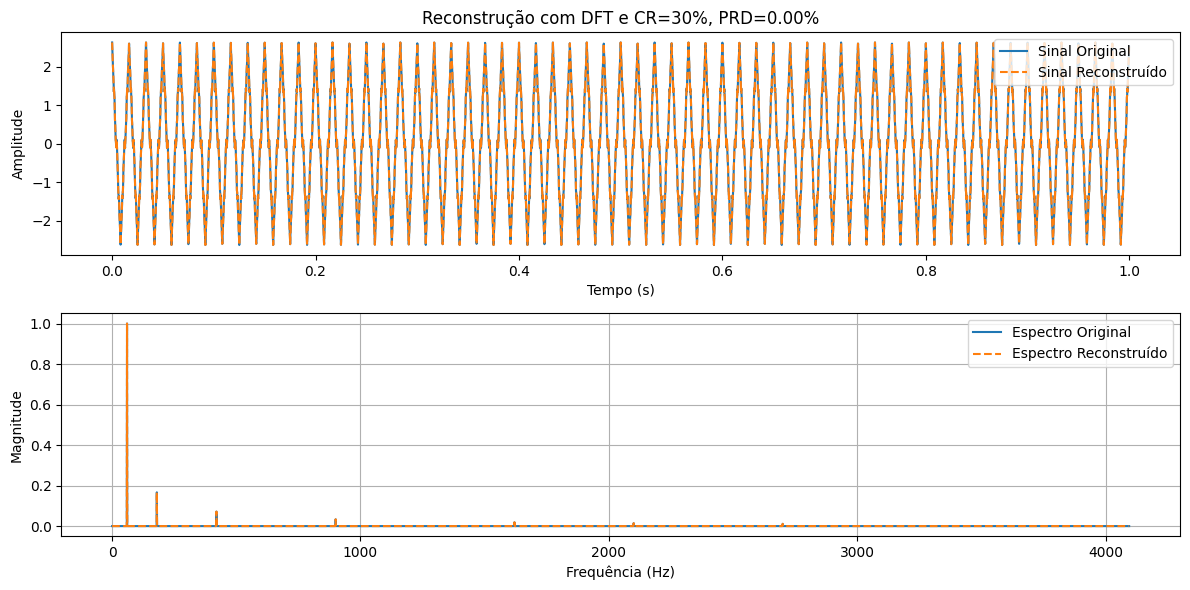

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import OrthogonalMatchingPursuit

print("omp, dft")

# Função para calcular o PRD (mesma do primeiro código)
def calculate_prd(original, reconstructed):
    return np.sqrt(np.sum((original - reconstructed) ** 2) / np.sum(original ** 2)) * 100

# Função para calcular o RMSE (mesma do primeiro código)
def calculate_rmse(original, reconstructed):
    return np.sqrt(np.mean((original - reconstructed) ** 2))

# Parâmetros do sinal (organizados como no primeiro código)
Nppc = 256  # Número de pontos por ciclo (adicionado para consistência)
Nc = 12     # Número de ciclos (adicionado para consistência)
f = 60      # Frequência fundamental (Hz)
Fs = 8192   # Frequência de amostragem
Ts = 1 / Fs # Período de amostragem
t = np.linspace(0, (Fs - 1) * Ts, Fs)  # Vetor de tempo

# Sinal harmônico (mesmo estilo do primeiro código)
y = np.cos(2 * np.pi * f * t)
harm = [1, 3, 7, 15, 27, 35, 45]  # Harmônicas ímpares
for h in harm:
    y += (1 / h) * np.cos(2 * np.pi * h * f * t)

# DFT do sinal original (normalizada, substituindo a DCT)
original_fft = np.fft.fft(y) / len(y)
frequencies = np.fft.fftfreq(len(y), d=Ts)

# Amostragem Compressiva (mesmo padrão do primeiro código)
CR = 30 # Taxa de compressão
N = len(y)
M = int(N * (100 - CR) / 100)
amostras_aleatorias = np.random.choice(N, M, replace=False)
amostras_aleatorias.sort()

# Matriz de medição baseada na DFT (substitui a DCT)
A_complex = np.fft.fft(np.eye(N)) / np.sqrt(N)  # Normalização ortogonal
A_complex = A_complex[amostras_aleatorias, :]

# Separar parte real e imaginária (adaptado para DFT)
A_real = np.vstack([np.real(A_complex), np.imag(A_complex)])

# Medições compressivas (mesmo estilo)
s = y[amostras_aleatorias]
s_real = np.hstack([np.real(s), np.imag(s)])

# Inicialização dos erros (igual ao primeiro código)
erros = np.zeros((200, 7))
rmse_values = np.zeros(200)
prd_values = np.zeros(200)
reconstructed_signals = np.zeros((200, len(y)))  # Armazenar sinais reconstruídos

# Loop de reconstrução (estilo do primeiro código)
for i in range(200):
    print(f"Iteração {i + 1} de 200")

    # OMP (substitui o CoSaMP, mas mantém a lógica)
    omp = OrthogonalMatchingPursuit(n_nonzero_coefs=14)
    omp.fit(A_real, s_real)
    recovered_coeffs = omp.coef_

    # Reconstrução via IDFT (substitui a IDCT)
    sig = np.fft.ifft(recovered_coeffs)
    sig = np.real(sig)
    sig = sig * (np.max(y) / np.max(sig))  # Normalização

    # Cálculo de métricas (mesmo padrão)
    prd_values[i] = calculate_prd(y, sig)
    rmse_values[i] = calculate_rmse(y, sig)
    reconstructed_fft = np.fft.fft(sig) / len(sig)

    # Cálculo do erro nas harmônicas (mesma lógica)
    indices_harm = [int(h * f * len(y) / Fs) for h in harm]
    for j, idx in enumerate(indices_harm):
        erros[i, j] = np.abs(original_fft[idx] - reconstructed_fft[idx])

    reconstructed_signals[i, :] = sig  # Armazenamento para média

# Médias (mesmo formato do primeiro código)
erros_medios = np.mean(erros, axis=0)
media_rmse = np.mean(rmse_values)
media_prd = np.mean(prd_values)
sinal_reconstruido_final = np.mean(reconstructed_signals, axis=0)

# Resultados (mesmo estilo de impressão)
print("\nMédia do erro nas harmônicas:")
for idx, h in enumerate(harm):
    print(f"Harmônica {h}: {erros_medios[idx]:.4f}")

print(f"\nMédia do RMSE: {media_rmse:.4f}")
print(f"Média do PRD: {media_prd:.4f}%")

# Gráficos (mesma organização do primeiro código)
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, y, label='Sinal Original')
plt.plot(t, sinal_reconstruido_final, label='Sinal Reconstruído', linestyle='dashed')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.title(f'Reconstrução com DFT e CR={CR}%, PRD={media_prd:.2f}%')

plt.subplot(2, 1, 2)
plt.plot(frequencies[:N//2], np.abs(original_fft[:N//2]), label='Espectro Original')
plt.plot(frequencies[:N//2], np.abs(np.fft.fft(sinal_reconstruido_final)[:N//2]) / N,
         label='Espectro Reconstruído', linestyle='dashed')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

omp, dct com ruído gaussiano
Iteração 1 de 200 (0.5%)
Iteração 2 de 200 (1.0%)
Iteração 3 de 200 (1.5%)
Iteração 4 de 200 (2.0%)
Iteração 5 de 200 (2.5%)
Iteração 6 de 200 (3.0%)
Iteração 7 de 200 (3.5%)
Iteração 8 de 200 (4.0%)
Iteração 9 de 200 (4.5%)
Iteração 10 de 200 (5.0%)
Iteração 11 de 200 (5.5%)
Iteração 12 de 200 (6.0%)
Iteração 13 de 200 (6.5%)
Iteração 14 de 200 (7.0%)
Iteração 15 de 200 (7.5%)
Iteração 16 de 200 (8.0%)
Iteração 17 de 200 (8.5%)
Iteração 18 de 200 (9.0%)
Iteração 19 de 200 (9.5%)
Iteração 20 de 200 (10.0%)
Iteração 21 de 200 (10.5%)
Iteração 22 de 200 (11.0%)
Iteração 23 de 200 (11.5%)
Iteração 24 de 200 (12.0%)
Iteração 25 de 200 (12.5%)
Iteração 26 de 200 (13.0%)
Iteração 27 de 200 (13.5%)
Iteração 28 de 200 (14.0%)
Iteração 29 de 200 (14.5%)
Iteração 30 de 200 (15.0%)
Iteração 31 de 200 (15.5%)
Iteração 32 de 200 (16.0%)
Iteração 33 de 200 (16.5%)
Iteração 34 de 200 (17.0%)
Iteração 35 de 200 (17.5%)
Iteração 36 de 200 (18.0%)
Iteração 37 de 200 (18.5%)


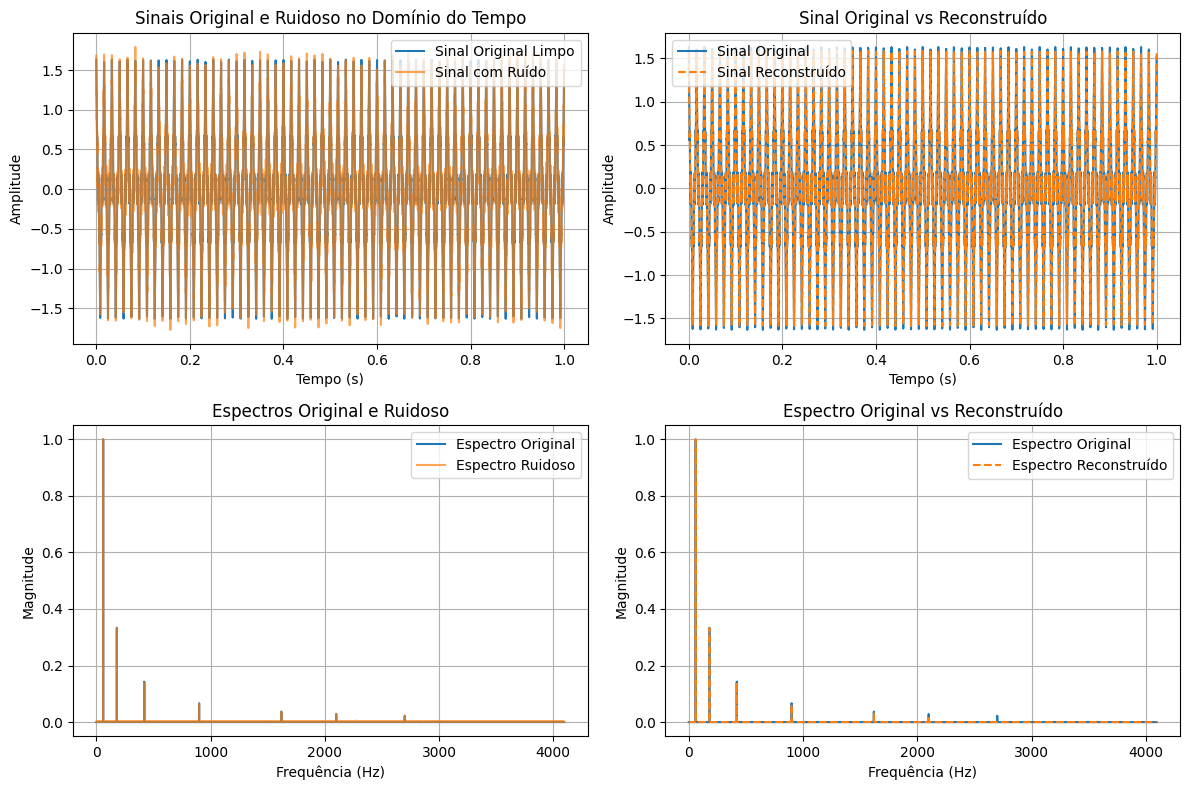

In [8]:
# -*- coding: utf-8 -*-
"""
Created on Mon Feb 24 08:54:39 2025

@author: josea
"""

import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as spfft
from sklearn.linear_model import OrthogonalMatchingPursuit

print("omp, dct com ruído gaussiano")
# Função para calcular o PRD
def calculate_prd(original, reconstructed):
    return np.sqrt(np.sum((original - reconstructed) ** 2) / np.sum(original ** 2))

# Função para calcular o Erro Médio Quadrático (RMSE)
def calculate_rmse(original, reconstructed):
    return np.sqrt(np.mean((original - reconstructed) ** 2))

# Parâmetros do sinal
Nppc = 256  # Número de pontos por ciclo
Nc = 12        # Número de ciclos
f = 60         # Frequência fundamental (Hz)
Fs = 8192      # Frequência de amostragem
Ts = 1 / Fs    # Período de amostragem
t = np.linspace(0, (Fs - 1) * Ts, Fs)  # Vetor de tempo

# Sinal harmônico com componentes fundamentais e harmônicos ímpares
x = np.cos(2 * np.pi * f * t)  # Componente fundamental (60 Hz)
y = np.zeros_like(x)

harm = [1, 3, 7, 15, 27, 35, 45]
for i in range(len(harm)):
    y += (1 / harm[i]) * np.cos(2 * np.pi * harm[i] * f * t)

# Adicionando ruído gaussiano ao sinal original
SNR_dB = 20  # Razão sinal-ruído em dB (ajuste conforme necessário)
ruido = np.random.normal(0, np.sqrt(np.var(y) / (10 ** (SNR_dB / 10))), len(y))
y_ruidoso = y + ruido

# Medição da FFT original
original_fft = 2 * np.abs(np.fft.fft(y) / len(y))[:len(y) // 2]
original_fft_ruidoso = 2 * np.abs(np.fft.fft(y_ruidoso) / len(y_ruidoso))[:len(y_ruidoso) // 2]
frequencies = np.fft.fftfreq(len(y), d=Ts)[:len(y) // 2]

# Amostragem Compressiva
CR = 30 # Taxa de compressão (%)
N = Fs
M = np.round(N * (100 - CR) / 100).astype(int)  # Número de medições
amostras_aleatorias = np.random.choice(N, M, replace=False)
amostras_aleatorias.sort()
s = y_ruidoso[amostras_aleatorias]  # Amostrando o sinal ruidoso
t2 = t[amostras_aleatorias]

# Matriz de Transformada Cosseno
A = spfft.idct(np.identity(N), norm='ortho', axis=0)
A = A[amostras_aleatorias]

# Inicializando matrizes para armazenar os erros, valores estimados, RMSE e PRD
num_iteracoes = 200
erros = np.zeros((num_iteracoes, len(harm)))  # Erros para cada harmônica
erros_ruidoso = np.zeros((num_iteracoes, len(harm)))  # Erros para sinal ruidoso
valores_estimados = np.zeros((num_iteracoes, len(harm)))  # Valores estimados
rmse_values = np.zeros(num_iteracoes)  # Para armazenar os valores de RMSE
prd_values = np.zeros(num_iteracoes)   # Para armazenar os valores de PRD

# Loop de reconstrução
for i in range(num_iteracoes):
    print(f"Iteração {i+1} de {num_iteracoes} ({(i+1)/num_iteracoes*100:.1f}%)")

    # Gerando amostras aleatórias do sinal ruidoso
    s = y_ruidoso[amostras_aleatorias]

    # Aplicando OMP para reconstrução do sinal
    omp = OrthogonalMatchingPursuit(n_nonzero_coefs=14)  # Ajustado para o número de harmônicas
    omp.fit(A, s)
    recovered_signal = omp.coef_

    # Reconstrução do sinal
    sig = spfft.idct(recovered_signal, norm='ortho', axis=0)

    # Calculando a FFT do sinal reconstruído
    S = 2 * np.abs(np.fft.fft(sig) / len(sig))[:len(sig) // 2]

    # Calculando os valores estimados e erros para cada harmônica
    for idx, h in enumerate(harm):
        harmonic_index = int(h * f * N / Fs)  # Índice da harmônica na FFT
        harmonic_index = min(harmonic_index, len(S) - 1)  # Garantir que o índice esteja dentro dos limites
        valores_estimados[i, idx] = S[harmonic_index]  # Valor estimado da harmônica
        erros[i, idx] = np.abs(original_fft[harmonic_index] - S[harmonic_index])  # Erro absoluto (vs sinal limpo)
        erros_ruidoso[i, idx] = np.abs(original_fft_ruidoso[harmonic_index] - S[harmonic_index])  # Erro vs sinal ruidoso

    # Calculando o RMSE e PRD para esta iteração
    rmse_values[i] = calculate_rmse(y, sig)  # Comparando com sinal original limpo
    prd_values[i] = calculate_prd(y, sig)

# Calculando as médias
media_valores_estimados = np.mean(valores_estimados, axis=0)
media_erros = np.mean(erros, axis=0)
media_erros_ruidoso = np.mean(erros_ruidoso, axis=0)
media_rmse = np.mean(rmse_values)
media_prd = np.mean(prd_values)

# Exibindo os resultados
print("\nValores Estimados Médios das Harmônicas:")
for idx, h in enumerate(harm):
    print(f"Harmônica {h}: {media_valores_estimados[idx]:.4f}")

print("\nErros Médios das Harmônicas (vs sinal limpo):")
for idx, h in enumerate(harm):
    print(f"Harmônica {h}: {media_erros[idx]:.4f}")

print("\nErros Médios das Harmônicas (vs sinal ruidoso):")
for idx, h in enumerate(harm):
    print(f"Harmônica {h}: {media_erros_ruidoso[idx]:.4f}")

print(f"\nMédia do RMSE: {media_rmse:.4f}")
print(f"Média do PRD: {media_prd:.4f}")

# Gráficos finais
plt.figure(figsize=(12, 8))

# Sinal no domínio do tempo
plt.subplot(2, 2, 1)
plt.plot(t, y, label='Sinal Original Limpo')
plt.plot(t, y_ruidoso, label='Sinal com Ruído', alpha=0.7)
plt.legend()
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Sinais Original e Ruidoso no Domínio do Tempo')
plt.grid()

# Sinal reconstruído
plt.subplot(2, 2, 2)
plt.plot(t, y, label='Sinal Original')
plt.plot(t, sig, label='Sinal Reconstruído', linestyle='dashed')
plt.legend()
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Sinal Original vs Reconstruído')
plt.grid()

# Espectro de frequência
plt.subplot(2, 2, 3)
plt.plot(frequencies, original_fft, label='Espectro Original')
plt.plot(frequencies, original_fft_ruidoso, label='Espectro Ruidoso', alpha=0.7)
plt.legend()
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.title('Espectros Original e Ruidoso')
plt.grid()

# Espectro reconstruído
plt.subplot(2, 2, 4)
plt.plot(frequencies, original_fft, label='Espectro Original')
plt.plot(frequencies, 2 * np.abs(np.fft.fft(sig) / len(sig))[:len(sig)//2],
         label='Espectro Reconstruído', linestyle='dashed')
plt.legend()
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.title('Espectro Original vs Reconstruído')
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import OrthogonalMatchingPursuit

print("omp, dft com ruído gaussiano")

# Funções de cálculo de métricas
def calculate_prd(original, reconstructed):
    return np.sqrt(np.sum((original - reconstructed) ** 2) / np.sum(original ** 2)) * 100

def calculate_rmse(original, reconstructed):
    return np.sqrt(np.mean((original - reconstructed) ** 2))

# Parâmetros do sinal
Nppc = 256  # Número de pontos por ciclo
Nc = 12     # Número de ciclos
f = 60      # Frequência fundamental (Hz)
Fs = 8192   # Frequência de amostragem
Ts = 1 / Fs # Período de amostragem
t = np.linspace(0, (Fs - 1) * Ts, Fs)  # Vetor de tempo

# Sinal harmônico
y = np.cos(2 * np.pi * f * t)
harm = [1, 3, 7, 15, 27, 35, 45]  # Harmônicas ímpares
for h in harm:
    y += (1 / h) * np.cos(2 * np.pi * h * f * t)

# ADIÇÃO DE RUÍDO GAUSSIANO
SNR_dB = 20  # Razão sinal-ruído em dB (ajuste conforme necessário)
ruido = np.random.normal(0, np.sqrt(np.var(y) / (10 ** (SNR_dB / 10))), len(y))
y_ruidoso = y + ruido

# DFT do sinal original e ruidoso
original_fft = np.fft.fft(y) / len(y)
original_fft_ruidoso = np.fft.fft(y_ruidoso) / len(y_ruidoso)
frequencies = np.fft.fftfreq(len(y), d=Ts)

# Amostragem Compressiva
CR = 30 # Taxa de compressão
N = len(y)
M = int(N * (100 - CR) / 100)
amostras_aleatorias = np.random.choice(N, M, replace=False)
amostras_aleatorias.sort()

# Matriz de medição baseada na DFT
A_complex = np.fft.fft(np.eye(N)) / np.sqrt(N)  # Normalização ortogonal
A_complex = A_complex[amostras_aleatorias, :]

# Separar parte real e imaginária
A_real = np.vstack([np.real(A_complex), np.imag(A_complex)])

# Medições compressivas do sinal ruidoso
s = y_ruidoso[amostras_aleatorias]
s_real = np.hstack([np.real(s), np.imag(s)])

# Inicialização dos erros
num_iteracoes = 200
erros = np.zeros((num_iteracoes, len(harm)))
erros_ruidoso = np.zeros((num_iteracoes, len(harm)))
rmse_values = np.zeros(num_iteracoes)
prd_values = np.zeros(num_iteracoes)
reconstructed_signals = np.zeros((num_iteracoes, len(y)))

# Loop de reconstrução
for i in range(num_iteracoes):
    print(f"Iteração {i + 1} de {num_iteracoes}")

    # OMP
    omp = OrthogonalMatchingPursuit(n_nonzero_coefs=14)
    omp.fit(A_real, s_real)
    recovered_coeffs = omp.coef_

    # Reconstrução via IDFT
    sig = np.fft.ifft(recovered_coeffs)
    sig = np.real(sig)
    sig = sig * (np.max(y) / np.max(sig))  # Normalização

    # Cálculo de métricas
    prd_values[i] = calculate_prd(y, sig)  # Comparação com sinal original limpo
    rmse_values[i] = calculate_rmse(y, sig)
    reconstructed_fft = np.fft.fft(sig) / len(sig)

    # Cálculo do erro nas harmônicas
    indices_harm = [int(h * f * len(y) / Fs) for h in harm]
    for j, idx in enumerate(indices_harm):
        erros[i, j] = np.abs(original_fft[idx] - reconstructed_fft[idx])  # vs original
        erros_ruidoso[i, j] = np.abs(original_fft_ruidoso[idx] - reconstructed_fft[idx])  # vs ruidoso

    reconstructed_signals[i, :] = sig

# Cálculo das médias
erros_medios = np.mean(erros, axis=0)
erros_medios_ruidoso = np.mean(erros_ruidoso, axis=0)
media_rmse = np.mean(rmse_values)
media_prd = np.mean(prd_values)
sinal_reconstruido_final = np.mean(reconstructed_signals, axis=0)

# Resultados
print("\nMédia do erro nas harmônicas (vs sinal original limpo):")
for idx, h in enumerate(harm):
    print(f"Harmônica {h}: {erros_medios[idx]:.4f}")

print("\nMédia do erro nas harmônicas (vs sinal ruidoso):")
for idx, h in enumerate(harm):
    print(f"Harmônica {h}: {erros_medios_ruidoso[idx]:.4f}")

print(f"\nMédia do RMSE: {media_rmse:.4f}")
print(f"Média do PRD: {media_prd:.4f}%")

# Gráficos
plt.figure(figsize=(14, 8))

# Sinal no tempo
plt.subplot(2, 2, 1)
plt.plot(t, y, label='Original Limpo')
plt.plot(t, y_ruidoso, label='Com Ruído', alpha=0.7)
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title(f'Sinais no Domínio do Tempo (SNR = {SNR_dB}dB)')
plt.legend()
plt.grid()

# Reconstrução no tempo
plt.subplot(2, 2, 2)
plt.plot(t, y, label='Original')
plt.plot(t, sinal_reconstruido_final, label='Reconstruído', linestyle='--')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title(f'Reconstrução (CR={CR}%, PRD={media_prd:.2f}%)')
plt.legend()
plt.grid()

# Espectro original vs ruidoso
plt.subplot(2, 2, 3)
plt.plot(frequencies[:N//2], np.abs(original_fft[:N//2]), label='Original')
plt.plot(frequencies[:N//2], np.abs(original_fft_ruidoso[:N//2]), label='Ruidoso', alpha=0.7)
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.title('Espectro Original vs Ruidoso')
plt.legend()
plt.grid()

# Espectro original vs reconstruído
plt.subplot(2, 2, 4)
plt.plot(frequencies[:N//2], np.abs(original_fft[:N//2]), label='Original')
plt.plot(frequencies[:N//2], np.abs(np.fft.fft(sinal_reconstruido_final)[:N//2])/N,
         label='Reconstruído', linestyle='--')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.title('Espectro Original vs Reconstruído')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

omp, dft com ruído gaussiano
Iteração 1 de 200
Iteração 2 de 200
Iteração 3 de 200
Iteração 4 de 200
Iteração 5 de 200
Iteração 6 de 200
Iteração 7 de 200
Iteração 8 de 200
Iteração 9 de 200
Iteração 10 de 200
Iteração 11 de 200
Iteração 12 de 200
Iteração 13 de 200
Iteração 14 de 200
Iteração 15 de 200
Iteração 16 de 200
Iteração 17 de 200
Iteração 18 de 200
Iteração 19 de 200
Iteração 20 de 200
Iteração 21 de 200
Iteração 22 de 200
Iteração 23 de 200
Iteração 24 de 200
Iteração 25 de 200
Iteração 26 de 200
Iteração 27 de 200
Iteração 28 de 200
Iteração 29 de 200
Iteração 30 de 200
Iteração 31 de 200
Iteração 32 de 200
Iteração 33 de 200
Iteração 34 de 200
Iteração 35 de 200
Iteração 36 de 200
Iteração 37 de 200
Iteração 38 de 200
Iteração 39 de 200
Iteração 40 de 200
Iteração 41 de 200
Iteração 42 de 200
Iteração 43 de 200
Iteração 44 de 200
Iteração 45 de 200
Iteração 46 de 200
Iteração 47 de 200
Iteração 48 de 200
Iteração 49 de 200
Iteração 50 de 200
Iteração 51 de 200
Iteração 52

cosamp, dft
Iteração 1 de 200
Iteração 2 de 200


<ipython-input-31-699eef834573>:74: ComplexWarning: Casting complex values to real discards the imaginary part
  x[support.astype(int)] = x_selected
<ipython-input-31-699eef834573>:103: ComplexWarning: Casting complex values to real discards the imaginary part
  reconstructed_dft[i, :] = np.fft.fft(sig)


Iteração 3 de 200
Iteração 4 de 200
Iteração 5 de 200
Iteração 6 de 200
Iteração 7 de 200
Iteração 8 de 200
Iteração 9 de 200
Iteração 10 de 200
Iteração 11 de 200
Iteração 12 de 200
Iteração 13 de 200
Iteração 14 de 200
Iteração 15 de 200
Iteração 16 de 200
Iteração 17 de 200
Iteração 18 de 200
Iteração 19 de 200
Iteração 20 de 200
Iteração 21 de 200
Iteração 22 de 200
Iteração 23 de 200
Iteração 24 de 200
Iteração 25 de 200
Iteração 26 de 200
Iteração 27 de 200
Iteração 28 de 200
Iteração 29 de 200
Iteração 30 de 200
Iteração 31 de 200
Iteração 32 de 200
Iteração 33 de 200
Iteração 34 de 200
Iteração 35 de 200
Iteração 36 de 200
Iteração 37 de 200
Iteração 38 de 200
Iteração 39 de 200
Iteração 40 de 200
Iteração 41 de 200
Iteração 42 de 200
Iteração 43 de 200
Iteração 44 de 200
Iteração 45 de 200
Iteração 46 de 200
Iteração 47 de 200
Iteração 48 de 200
Iteração 49 de 200
Iteração 50 de 200
Iteração 51 de 200
Iteração 52 de 200
Iteração 53 de 200
Iteração 54 de 200
Iteração 55 de 200


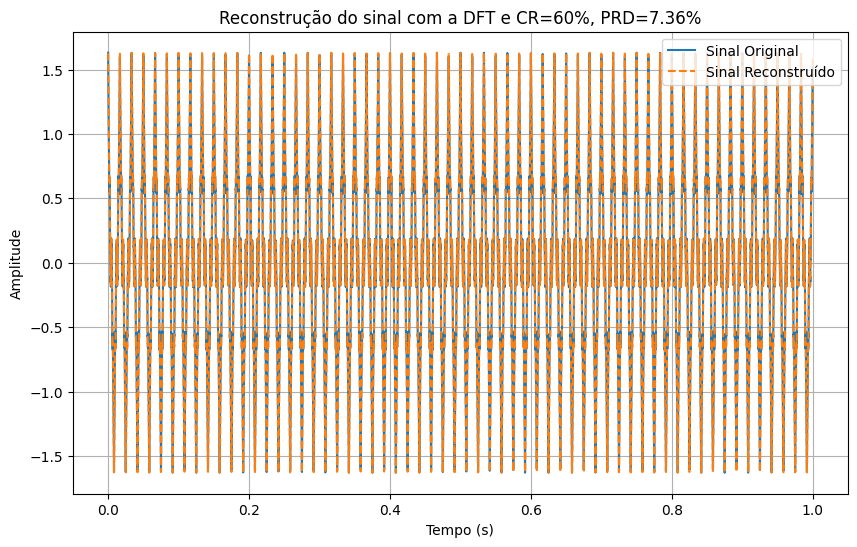

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import OrthogonalMatchingPursuit

print("cosamp, dft")

# Função para calcular o PRD
def calculate_prd(original, reconstructed):
    return np.sqrt(np.sum((original - reconstructed) ** 2) / np.sum(original ** 2)) * 100

# Função para calcular o Erro Médio Quadrático (RMSE)
def calculate_rmse(original, reconstructed):
    return np.sqrt(np.mean((original - reconstructed) ** 2))

# Parâmetros do sinal
Nppc = 256 # Número de pontos por ciclo
Nc = 12         # Número de ciclos
f = 60          # Frequência fundamental (Hz)
Fs = 8192       # Frequência de amostragem
Ts = 1 / Fs     # Período de amostragem
t = np.linspace(0, (Fs - 1) * Ts, Fs)  # Vetor de tempo

# Sinal harmônico com componentes fundamentais e harmônicos ímpares
x = np.cos(2 * np.pi * f * t)
y = np.zeros_like(x)

harm = [1, 3, 7, 15, 27, 35, 45]
for h in harm:
    y += (1 / h) * np.cos(2 * np.pi * h * f * t)

# DFT do sinal original
original_dft = np.fft.fft(y)
frequencies = np.fft.fftfreq(len(y), d=Ts)

# Amostragem Compressiva
CR = 60 # Taxa de compressão
N = len(y)
M = int(N * (100 - CR) / 100)
amostras_aleatorias = np.random.choice(N, M, replace=False)
amostras_aleatorias.sort()

# Matriz de medição baseada na DFT
A = np.fft.fft(np.eye(N), axis=0)
A = A[amostras_aleatorias, :]

# Medições compressivas
s = y[amostras_aleatorias]

# Inicializando os erros
erros = np.zeros((200, 7))
rmse_values = np.zeros(200)
prd_values = np.zeros(200)

# Implementação do COSAMP
def cosamp(A, s, num_coefs=14, iterations=1):
    """
    Implementação do algoritmo COSAMP
    """
    r = s.copy()  # Residual
    support = []  # Suporte (coeficientes não nulos)
    x = np.zeros(A.shape[1])  # Solução inicial

    for it in range(iterations):
        # Seleção de índices
        correlations = np.abs(A.T @ r)
        idx = np.argsort(correlations)[-num_coefs:]
        support = np.union1d(support, idx)  # Atualizando o suporte

        # Resolução do problema de mínimos quadrados
        A_selected = A[:, support.astype(int)]
        x_selected = np.linalg.lstsq(A_selected, s, rcond=None)[0]

        # Atualizando o vetor x
        x[support.astype(int)] = x_selected

        # Atualizando o residual
        r = s - A @ x

    return x

a = 200
reconstructed_dft = np.zeros([a, len(x)])

# Loop de reconstrução
for i in range(a):
    print(f"Iteração {i + 1} de 200")

    # Aplicando COSAMP para reconstrução no domínio da frequência
    recovered_coeffs = cosamp(A, s, num_coefs=14, iterations=1)

    # Reconstrução do sinal no domínio do tempo usando IDFT
    sig = np.fft.ifft(recovered_coeffs)
    sig = np.real(sig)

    # Normalização do sinal reconstruído
    sig = sig * (np.max(y) / np.max(sig))

    # Cálculo do PRD e RMSE
    prd_values[i] = calculate_prd(y, sig)
    rmse_values[i] = calculate_rmse(y, sig)

    # DFT do sinal reconstruído
    reconstructed_dft[i, :] = np.fft.fft(sig)

    # Cálculo dos erros nas harmônicas
    indices_harm = [int(h * f * len(y) / Fs) for h in harm]
    for j, idx in enumerate(indices_harm):
        erros[i, j] = np.abs(original_dft[idx] - reconstructed_dft[i, idx])

# Cálculo das médias
erros_medios = np.mean(erros, axis=0)
media_rmse = np.mean(rmse_values)
media_prd = np.mean(prd_values)

reconstructed_dft = np.sum(reconstructed_dft) / a

# Exibindo os resultados
print("\nMédia do erro nas harmônicas:")
for idx, h in enumerate(harm):
    print(f"Harmônica {h}: {erros_medios[idx]:.4f}")

print(f"\nMédia do RMSE: {media_rmse:.4f}")
print(f"Média do PRD: {media_prd:.4f}%")

# Gráficos
plt.figure(figsize=(10, 6))
plt.plot(t, y, label='Sinal Original')
plt.plot(t, sig, label='Sinal Reconstruído', linestyle='dashed')
plt.legend()
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title(f'Reconstrução do sinal com a DFT e CR={CR}%, PRD={media_prd:.2f}%')
plt.grid()
plt.show()


cosamp, dct
Iteração 1 de 200
Iteração 2 de 200
Iteração 3 de 200
Iteração 4 de 200
Iteração 5 de 200
Iteração 6 de 200
Iteração 7 de 200
Iteração 8 de 200
Iteração 9 de 200
Iteração 10 de 200
Iteração 11 de 200
Iteração 12 de 200
Iteração 13 de 200
Iteração 14 de 200
Iteração 15 de 200
Iteração 16 de 200
Iteração 17 de 200
Iteração 18 de 200
Iteração 19 de 200
Iteração 20 de 200
Iteração 21 de 200
Iteração 22 de 200
Iteração 23 de 200
Iteração 24 de 200
Iteração 25 de 200
Iteração 26 de 200
Iteração 27 de 200
Iteração 28 de 200
Iteração 29 de 200
Iteração 30 de 200
Iteração 31 de 200
Iteração 32 de 200
Iteração 33 de 200
Iteração 34 de 200
Iteração 35 de 200
Iteração 36 de 200
Iteração 37 de 200
Iteração 38 de 200
Iteração 39 de 200
Iteração 40 de 200
Iteração 41 de 200
Iteração 42 de 200
Iteração 43 de 200
Iteração 44 de 200
Iteração 45 de 200
Iteração 46 de 200
Iteração 47 de 200
Iteração 48 de 200
Iteração 49 de 200
Iteração 50 de 200
Iteração 51 de 200
Iteração 52 de 200
Iteração 

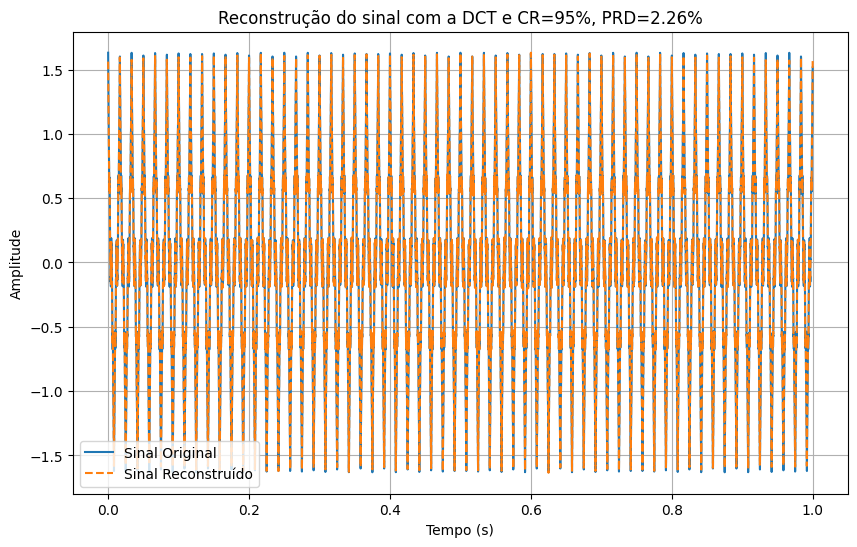

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct, idct

print("cosamp, dct")

# Função para calcular o PRD
def calculate_prd(original, reconstructed):
    return np.sqrt(np.sum((original - reconstructed) ** 2) / np.sum(original ** 2)) * 100

# Função para calcular o Erro Médio Quadrático (RMSE)
def calculate_rmse(original, reconstructed):
    return np.sqrt(np.mean((original - reconstructed) ** 2))

# Parâmetros do sinal
Nppc = 256  # Número de pontos por ciclo
Nc = 12  # Número de ciclos
f = 60  # Frequência fundamental (Hz)
Fs = 8192  # Frequência de amostragem
Ts = 1 / Fs  # Período de amostragem
t = np.linspace(0, (Fs - 1) * Ts, Fs)  # Vetor de tempo

# Sinal harmônico com componentes fundamentais e harmônicos ímpares
x = np.cos(2 * np.pi * f * t)
y = np.zeros_like(x)

harm = [1, 3, 7, 15, 27, 35, 45]
for h in harm:
    y += (1 / h) * np.cos(2 * np.pi * h * f * t)

# DCT do sinal original
original_dct = dct(y, norm='ortho')  # DCT para o sinal original
frequencies = np.fft.fftfreq(len(y), d=Ts)

# Amostragem Compressiva
CR = 95  # Taxa de compressão
N = len(y)
M = int(N * (100 - CR) / 100)
amostras_aleatorias = np.random.choice(N, M, replace=False)
amostras_aleatorias.sort()

# Matriz de medição baseada na DCT
A = dct(np.eye(N), norm='ortho')  # DCT da matriz identidade
A = A[amostras_aleatorias, :]

# Medições compressivas
s = y[amostras_aleatorias]

# Inicializando os erros
erros = np.zeros((200, 7))
rmse_values = np.zeros(200)
prd_values = np.zeros(200)

# Implementação do COSAMP
def cosamp(A, s, num_coefs=14, iterations=5):
    """
    Implementação do algoritmo COSAMP
    """
    r = s.copy()  # Residual
    support = []  # Suporte (coeficientes não nulos)
    x = np.zeros(A.shape[1])  # Solução inicial

    for it in range(iterations):
        # Seleção de índices
        correlations = np.abs(A.T @ r)
        idx = np.argsort(correlations)[-num_coefs:]
        support = np.union1d(support, idx)  # Atualizando o suporte

        # Resolução do problema de mínimos quadrados
        A_selected = A[:, support.astype(int)]
        x_selected = np.linalg.lstsq(A_selected, s, rcond=None)[0]

        # Atualizando o vetor x
        x[support.astype(int)] = x_selected

        # Atualizando o residual
        r = s - A @ x

    return x

a = 200
reconstructed_dct = np.zeros([a, len(x)])

# Loop de reconstrução
for i in range(a):
    print(f"Iteração {i + 1} de 200")

    # Aplicando COSAMP para reconstrução no domínio da frequência (DCT)
    recovered_coeffs = cosamp(A, s, num_coefs=14, iterations=5)

    # Reconstrução do sinal no domínio do tempo usando a IDCT
    sig = idct(recovered_coeffs, norm='ortho')  # IDCT para reconstrução
    sig = np.real(sig)

    # Normalização do sinal reconstruído
    sig = sig * (np.max(y) / np.max(sig))

    # Cálculo do PRD e RMSE
    prd_values[i] = calculate_prd(y, sig)
    rmse_values[i] = calculate_rmse(y, sig)

    # DCT do sinal reconstruído
    reconstructed_dct[i, :] = dct(sig, norm='ortho')

    # Cálculo dos erros nas harmônicas
    indices_harm = [int(h * f * len(y) / Fs) for h in harm]
    for j, idx in enumerate(indices_harm):
        erros[i, j] = np.abs(original_dct[idx] - reconstructed_dct[i, idx])

# Cálculo das médias
erros_medios = np.mean(erros, axis=0)
media_rmse = np.mean(rmse_values)
media_prd = np.mean(prd_values)

reconstructed_dct = np.sum(reconstructed_dct) / a

# Exibindo os resultados
print("\nMédia do erro nas harmônicas:")
for idx, h in enumerate(harm):
    print(f"Harmônica {h}: {erros_medios[idx]:.4f}")

print(f"\nMédia do RMSE: {media_rmse:.4f}")
print(f"Média do PRD: {media_prd:.4f}%")

# Gráficos
plt.figure(figsize=(10, 6))
plt.plot(t, y, label='Sinal Original')
plt.plot(t, sig, label='Sinal Reconstruído', linestyle='dashed')
plt.legend()
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title(f'Reconstrução do sinal com a DCT e CR={CR}%, PRD={media_prd:.2f}%')
plt.grid()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct, idct

print("cosamp, dct com ruído gaussiano")

# Funções de métricas (mantidas conforme seu original)
def calculate_prd(original, reconstructed):
    return np.sqrt(np.sum((original - reconstructed) ** 2) / np.sum(original ** 2)) * 100

def calculate_rmse(original, reconstructed):
    return np.sqrt(np.mean((original - reconstructed) ** 2))

# Parâmetros do sinal (mantidos)
Nppc = 256
Nc = 12
f = 60
Fs = 8192
Ts = 1 / Fs
t = np.linspace(0, (Fs - 1) * Ts, Fs)

# Geração do sinal harmônico
x = np.cos(2 * np.pi * f * t)
y = np.zeros_like(x)
harm = [1, 3, 7, 15, 27, 35, 45]
for h in harm:
    y += (1 / h) * np.cos(2 * np.pi * h * f * t)

# Adição de ruído gaussiano
SNR_dB = 20  # Razão sinal-ruído em dB (ajuste conforme necessário)
ruido = np.random.normal(0, np.sqrt(np.var(y) / (10 ** (SNR_dB / 10))), len(y))
y_ruidoso = y + ruido

# DCT dos sinais
original_dct = dct(y, norm='ortho')
ruidoso_dct = dct(y_ruidoso, norm='ortho')
frequencies = np.fft.fftfreq(len(y), d=Ts)

# Amostragem Compressiva
CR = 95
N = len(y)
M = int(N * (100 - CR) / 100)
amostras_aleatorias = np.random.choice(N, M, replace=False)
amostras_aleatorias.sort()

# Matriz de medição baseada na DCT
A = dct(np.eye(N), norm='ortho')
A = A[amostras_aleatorias, :]

# Implementação do COSAMP (mantida conforme seu original)
def cosamp(A, s, num_coefs=14, iterations=5):
    r = s.copy()
    support = []
    x = np.zeros(A.shape[1])
    for it in range(iterations):
        correlations = np.abs(A.T @ r)
        idx = np.argsort(correlations)[-num_coefs:]
        support = np.union1d(support, idx)
        A_selected = A[:, support.astype(int)]
        x_selected = np.linalg.lstsq(A_selected, s, rcond=None)[0]
        x[support.astype(int)] = x_selected
        r = s - A @ x
    return x

# Inicialização de variáveis para análise
num_iteracoes = 200
erros = np.zeros((num_iteracoes, len(harm)))
erros_ruidoso = np.zeros((num_iteracoes, len(harm)))
rmse_values = np.zeros(num_iteracoes)
prd_values = np.zeros(num_iteracoes)
rmse_ruidoso_values = np.zeros(num_iteracoes)
prd_ruidoso_values = np.zeros(num_iteracoes)

# Loop de reconstrução
for i in range(num_iteracoes):
    print(f"Iteração {i + 1} de {num_iteracoes}")

    # Usando o sinal ruidoso para reconstrução
    s = y_ruidoso[amostras_aleatorias]

    # COSAMP
    recovered_coeffs = cosamp(A, s, num_coefs=14, iterations=5)

    # Reconstrução
    sig = idct(recovered_coeffs, norm='ortho')
    sig = np.real(sig)
    sig = sig * (np.max(y) / np.max(sig))

    # Cálculo de métricas (comparando com sinal original limpo)
    prd_values[i] = calculate_prd(y, sig)
    rmse_values[i] = calculate_rmse(y, sig)

    # Cálculo de métricas (comparando com sinal ruidoso)
    prd_ruidoso_values[i] = calculate_prd(y_ruidoso, sig)
    rmse_ruidoso_values[i] = calculate_rmse(y_ruidoso, sig)

    # Análise de harmônicas
    reconstructed_dct = dct(sig, norm='ortho')
    indices_harm = [int(h * f * len(y) / Fs) for h in harm]
    for j, idx in enumerate(indices_harm):
        erros[i, j] = np.abs(original_dct[idx] - reconstructed_dct[idx])
        erros_ruidoso[i, j] = np.abs(ruidoso_dct[idx] - reconstructed_dct[idx])

# Cálculo das médias
erros_medios = np.mean(erros, axis=0)
erros_medios_ruidoso = np.mean(erros_ruidoso, axis=0)
media_rmse = np.mean(rmse_values)
media_prd = np.mean(prd_values)
media_rmse_ruidoso = np.mean(rmse_ruidoso_values)
media_prd_ruidoso = np.mean(prd_ruidoso_values)

# Resultados
print("\nResultados comparativos:")
print(f"\nComparado com sinal ORIGINAL limpo:")
print(f"Média PRD: {media_prd:.2f}%")
print(f"Média RMSE: {media_rmse:.6f}")

print(f"\nComparado com sinal RUIDOSO:")
print(f"Média PRD: {media_prd_ruidoso:.2f}%")
print(f"Média RMSE: {media_rmse_ruidoso:.6f}")

print("\nErro médio nas harmônicas (vs original):")
for idx, h in enumerate(harm):
    print(f"Harmônica {h}: {erros_medios[idx]:.4f}")

print("\nErro médio nas harmônicas (vs ruidoso):")
for idx, h in enumerate(harm):
    print(f"Harmônica {h}: {erros_medios_ruidoso[idx]:.4f}")

# Gráficos comparativos
plt.figure(figsize=(14, 10))

# Sinais no tempo
plt.subplot(2, 2, 1)
plt.plot(t, y, label='Original Limpo')
plt.plot(t, y_ruidoso, label='Com Ruído', alpha=0.7)
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title(f'Sinais no Domínio do Tempo (SNR = {SNR_dB}dB)')
plt.legend()
plt.grid()

# Reconstrução
plt.subplot(2, 2, 2)
plt.plot(t, y, label='Original')
plt.plot(t, sig, label='Reconstruído', linestyle='--')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title(f'Reconstrução (CR={CR}%, PRD={media_prd:.2f}%)')
plt.legend()
plt.grid()

# Espectros
plt.subplot(2, 2, 3)
plt.plot(frequencies[:N//2], np.abs(original_dct[:N//2]), label='Original')
plt.plot(frequencies[:N//2], np.abs(ruidoso_dct[:N//2]), label='Ruidoso', alpha=0.7)
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude DCT')
plt.title('Espectros DCT Original vs Ruidoso')
plt.legend()
plt.grid()

# Erros por harmônica
plt.subplot(2, 2, 4)
plt.bar(range(len(harm)), erros_medios, alpha=0.7, label='Erro vs Original')
plt.bar(range(len(harm)), erros_medios_ruidoso, alpha=0.5, label='Erro vs Ruidoso')
plt.xticks(range(len(harm)), harm)
plt.xlabel('Harmônica')
plt.ylabel('Erro Médio')
plt.title('Erro por Componente Harmônica')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import OrthogonalMatchingPursuit
import time

print("cosamp, dft com ruído gaussiano")

def calculate_prd(original, reconstructed):
    return np.sqrt(np.sum((original - reconstructed)**2) / np.sum(original**2)) * 100

def calculate_rmse(original, reconstructed):
    return np.sqrt(np.mean((original - reconstructed)**2))

## Parâmetros do sinal
Nppc = 256
Nc = 12
f = 60
Fs = 8192
Ts = 1/Fs
t = np.linspace(0, (Fs-1)*Ts, Fs)

## Geração do sinal harmônico
harm = np.array([1, 3, 7, 15, 27, 35, 45])
y = np.sum([(1/h)*np.cos(2*np.pi*h*f*t) for h in harm], axis=0)

## Adição de ruído gaussiano
SNR_dB = 20  # Razão sinal-ruído em dB
ruido = np.random.normal(0, np.sqrt(np.var(y)/(10**(SNR_dB/10))), len(y))
y_ruidoso = y + ruido

## DFT dos sinais (substituindo a DCT)
original_dft = np.fft.fft(y)/len(y)
ruidoso_dft = np.fft.fft(y_ruidoso)/len(y_ruidoso)
frequencies = np.fft.fftfreq(len(y), d=Ts)

## Amostragem Compressiva
CR = 95
N = len(y)
M = int(N*(100-CR)/100)
amostras_aleatorias = np.random.choice(N, M, replace=False)
amostras_aleatorias.sort()

## Matriz de medição baseada na DFT (substituindo a DCT)
print("Calculando matriz de medição DFT...")
start_time = time.time()
A = np.fft.fft(np.eye(N))/np.sqrt(N)  # DFT ortogonal
A = A[amostras_aleatorias, :]
A_real = np.vstack([np.real(A), np.imag(A)])  # Separando partes real e imaginária
print(f"Matriz calculada em {time.time()-start_time:.2f}s")

## Implementação do COSAMP adaptada para DFT
def cosamp_dft(A, s, num_coefs=14, iterations=5):
    r = s.copy()
    support = []
    x = np.zeros(A.shape[1])
    for it in range(iterations):
        correlations = np.abs(A.T @ r)
        idx = np.argsort(correlations)[-num_coefs:]
        support = np.union1d(support, idx)
        A_selected = A[:, support.astype(int)]
        x_selected = np.linalg.lstsq(A_selected, s, rcond=None)[0]
        x[support.astype(int)] = x_selected
        r = s - A @ x
    return x

## Inicialização de variáveis para análise
num_iteracoes = 200
erros = np.zeros((num_iteracoes, len(harm)))
erros_ruidoso = np.zeros((num_iteracoes, len(harm)))
rmse_values = np.zeros(num_iteracoes)
prd_values = np.zeros(num_iteracoes)
rmse_ruidoso_values = np.zeros(num_iteracoes)
prd_ruidoso_values = np.zeros(num_iteracoes)

## Loop de reconstrução
print("Iniciando reconstrução...")
start_time = time.time()

for i in range(num_iteracoes):
    if (i+1) % 20 == 0:
        print(f"Iteração {i+1} de {num_iteracoes}")

    # Usando o sinal ruidoso para reconstrução
    s = y_ruidoso[amostras_aleatorias]
    s_real = np.hstack([np.real(s), np.imag(s)])

    # COSAMP com DFT
    recovered_coeffs = cosamp_dft(A_real, s_real, num_coefs=14, iterations=5)

    # Reconstrução via IDFT (substituindo a IDCT)
    sig = np.fft.ifft(recovered_coeffs)
    sig = np.real(sig)
    sig = sig * (np.max(y)/np.max(sig))

    # Cálculo de métricas
    prd_values[i] = calculate_prd(y, sig)
    rmse_values[i] = calculate_rmse(y, sig)
    prd_ruidoso_values[i] = calculate_prd(y_ruidoso, sig)
    rmse_ruidoso_values[i] = calculate_rmse(y_ruidoso, sig)

    # Análise de harmônicas no domínio da frequência
    reconstructed_dft = np.fft.fft(sig)/len(sig)
    indices_harm = (harm*f*len(y)/Fs).astype(int)
    indices_harm = np.clip(indices_harm, 0, len(frequencies)-1)  # Garantindo índices válidos

    erros[i,:] = np.abs(original_dft[indices_harm] - reconstructed_dft[indices_harm])
    erros_ruidoso[i,:] = np.abs(ruidoso_dft[indices_harm] - reconstructed_dft[indices_harm])

print(f"Reconstrução concluída em {time.time()-start_time:.2f}s")

## Resultados
print("\nResultados comparativos:")
print(f"\nComparado com sinal ORIGINAL limpo:")
print(f"Média PRD: {np.mean(prd_values):.2f}%")
print(f"Média RMSE: {np.mean(rmse_values):.6f}")

print(f"\nComparado com sinal RUIDOSO:")
print(f"Média PRD: {np.mean(prd_ruidoso_values):.2f}%")
print(f"Média RMSE: {np.mean(rmse_ruidoso_values):.6f}")

print("\nErro médio nas harmônicas (vs original):